### Dimensionality Reduction Exercises

---


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Load the dataset 

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

### Exercise 1: Perform PCA on scaled_data

In [6]:
from sklearn.decomposition import PCA

### My answer
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_data)

#pca_result
#pca_result.shape

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

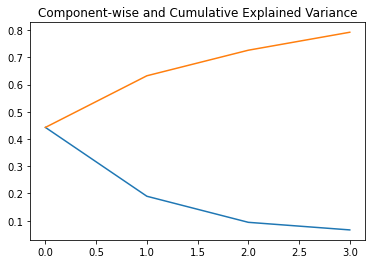

In [7]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

### Exercise 2: Visualize the PCA result

Text(0, 0.5, 'Second Principal Component')

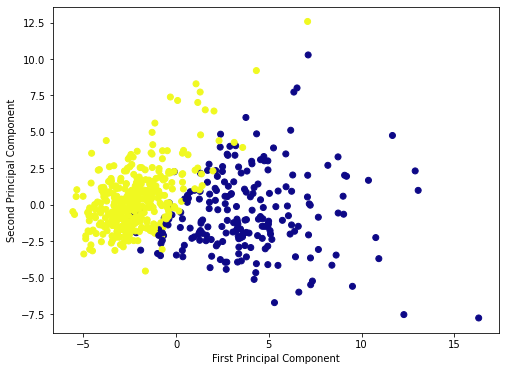

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0],pca_result[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Load second dataset "digits"

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()

In [11]:
digits.data.shape

(1797, 64)

In [12]:
data_X = digits.data[:600]
y = digits.target[:600]

In [13]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Exercise 3: perform t-SNE on 

In [14]:
from sklearn.manifold import TSNE

### My Answer
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data_X)

tsne_result


array([[  3.0415187,  41.909863 ],
       [-14.410232 , -15.659596 ],
       [-10.632412 ,  -5.049277 ],
       ...,
       [  8.34407  , -25.584389 ],
       [-36.26616  ,  11.245662 ],
       [  2.0363266,  10.598567 ]], dtype=float32)

In [15]:
tsne_df = pd.DataFrame({'X':tsne_result[:,0],'Y':tsne_result[:,1],'digit':y})
tsne_df.head(10)

,X,Y,digit
0,3.041519,41.909863,0
1,-14.410232,-15.659596,1
2,-10.632412,-5.049277,2
3,11.327030,3.400350,3
4,-15.944774,-28.870058,4
5,16.621458,16.275686,5
6,-33.100769,7.499270,6
7,10.387278,-24.233305,7
8,-2.486409,-4.787841,8
9,18.257229,15.734707,9


### Exercise 4: Visualize results from t-SNE

Text(0, 0.5, 'Y')

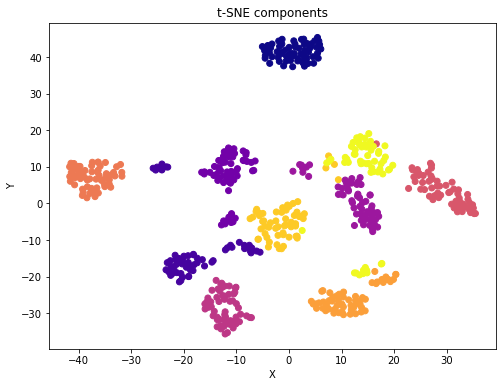

In [16]:
plt.figure(figsize=(8,6))
plt.title('t-SNE components')
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=tsne_df['digit'],cmap='plasma')
plt.xlabel('X')
plt.ylabel('Y')

<AxesSubplot:xlabel='X', ylabel='Y'>

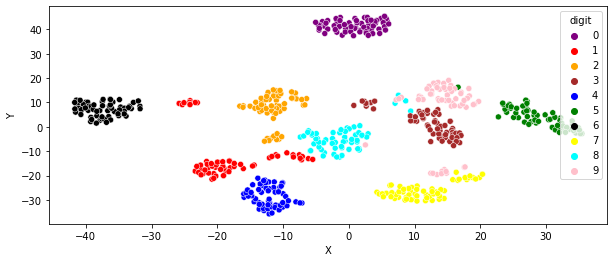

In [17]:
plt.figure(figsize=(10,4))
sns.scatterplot(x="X",y="Y",data=tsne_df, hue='digit',
                palette=['purple','red','orange','brown','blue','green','black','yellow','cyan','pink'],
                legend='full')